In [1]:
#imports!

# let's import things
import h5py as h5 
import pandas as pd
from astropy.table import Table
from astropy import units as u
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text.latex', preamble=r'\usepackage{textgreek}')
plt.rc('font', family='serif')
import sys
import os
from scipy import stats
import seaborn as sns
import matplotlib as mpl

# Add the subdir to sys.path for our created scripts
sys.path.append('/home/jovyan/home/research_work/useful_py_scripts/')
sys.path.append('/home/jovyan/home/research_work/making_figures/paper_figures/')

# Now you can import the module
import useful_fncs
import figure_utils
import utils_from_others

# import for axes labels 
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif"
})

In [ ]:
# we want to compute what is in the rates table now

# let's first look at the fiducial of Massive_WDWD

pathToH5 = '/home/jovyan/CompasOutput/v03.21.00/N_5e6_MassiveWDWD_NSNS_fid/MainRun/COMPAS_Output_wWeights.h5'

Data  = h5.File(pathToH5, "r")

DCOs = Data['BSE_Double_Compact_Objects'] # getting the DCO objects

# gathering the double compact objects that we have computed rates for
DCO_mask = Data['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048']['DCOmask'][()]

# making sure we are rpesenting the true universe
mixture_weights_all = DCOs['mixture_weight'][()]
mixture_weights = mixture_weights_all[DCO_mask]

# times (these should be in Myr)
lifetimes_all = DCOs['Time'][()]
lifetimes = lifetimes_all[DCO_mask]

col_times_all = DCOs['Coalescence_Time'][()]
col_times = col_times_all[DCO_mask]

# this should hypothetically be the DCO systems that merge within a hubble time (since DCO mask was applied) 
delay_times = lifetimes + col_times


In [ ]:
# let's see if there are any system that merge beyond a hubble time

hubble_time = 13.9e3
condition_no_mergers = delay_times > hubble_time

no_mergers = np.sum(condition_no_mergers)

merged_systems = len(delay_times) - no_mergers

condition_mergers = delay_times < hubble_time
mergers = np.sum(condition_mergers)

print("The number of systems that merge within a hubble time is = {}." .format(merged_systems))
print("The number of systems that merge withina  hubble time is = {}" .format(mergers))

# yay both ways get the same value!

The number of systems that merge within a hubble time is = 2815776.
The number of systems that merge withina  hubble time is = 2815776


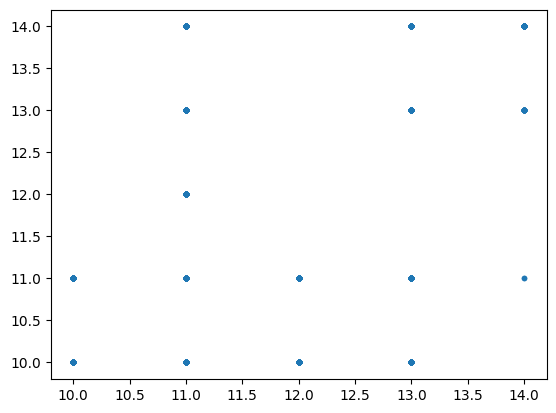

In [8]:
# let's look at what types of systems these are

stellar_types_1_all = DCOs['Stellar_Type(1)'][()]
stellar_types_1 = stellar_types_1_all[DCO_mask]

stellar_types_2_all = DCOs['Stellar_Type(2)'][()]
stellar_types_2 = stellar_types_2_all[DCO_mask]

plt.plot(stellar_types_1,stellar_types_2,'.')

Since with the DCO mask, we have systems that merge past hubble time, we need to make sure that we only select systems with delay times below hubble time.

In [ ]:
plt.hist(delay_times[condition])